# 18 - Topic Modeling

Reference [What is Topic Modeling? An Introduction With Examples](https://www.datacamp.com/tutorial/what-is-topic-modeling)


* El ***Topic Modeling*** es una técnica ***no supervisada*** para ***extraer los topics (o temas) ocultos que hay en un corpus***. `Identify topics based on patterns (such as word clusters and their frequencies)`.

* La ***Topic Classification*** de temas es un enfoque de ***aprendizaje supervisado*** que utiliza ***sistemas basados en reglas*** (algoritmos de aprendizaje automático) que se entrenan manualmente utilizando datos anotados y temas predefinidos.

* Una de las principales aplicaciones del ***NLP*** es la de ***extraer automáticamente los temas*** sobre los que hablan las personas, artículos, tweets, etc. sobre un volumen de textos importante.


* Existen diferentes técnicas para ***extraer los topics*** de los corpus, siendo las más conocidas:
    1. ***LSI***: Latent Semantic Index
    2. ***PLSI***: Probabilistic Latent Semantic Index
    3. ***LDA***: Latent Dirichlet Allocation
    
    
* En esencia, la finalidad de estas técnicas es la de extraer una serie de ***factores latentes*** que ***representen tanto a las palabras como a los documentos del corpus*** y a partir de esos factores latentes podremos estudiar:
    - Relación entre documentos
    - Relación entre palabras
    - Extracción de topics (temas)
    
    
* Para ello necesitamos ***representar el copus con una matriz*** (bolsa de palabras) de la siguiente manera:
    - ***Filas***: Cada fila representa a un documento.
    - ***Columnas***: Cada columnas representa a una palabra.
    - ***Celda***: Cada celda representa el número de veces que aparece la palabra en el documento.
    
    
* A partir de la matriz que representa al corpus, tenemos que obtener dos matrices:
    1. ***Factores Latentes de las Palabras***
    2. ***Factores Latentes de los documentos***
    
    
$$\begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & Corpus &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} =  \begin{bmatrix}
\: \\ 
\: \\ 
  Documentos\\ 
  _{nxK}\\ 
\:
\end{bmatrix} \cdot \begin{bmatrix} 
  Palabras\\ 
  _{Kxm}\\ 
\end{bmatrix}; \: siendo \rightarrow  \: \left\{\begin{matrix}
n: Número \: de \: Documentos\\ 
m: Número \: de \: Palabras\\ 
K: Número \: de \: Factores \: Latentes
\end{matrix}\right.$$


<hr>


## Ejemplo:


* Veamos a continuación un sencillo ejemplo sobre un copus de 4 documentos:
    - ***Doc 1***: _ronaldo _ronaldo _messi balon
    - ***Doc 2***: _ronaldo _messi _messi _messi
    - ***Doc 3***: gasol gasol triple balon
    - ***Doc 4***: triple triple gasol
    
    
* Se puede observar en estos documentos del Corpus que hay dos temáticas diferenciadas que son '*fútbol*' y '*baloncesto*'.


* Pasamos a construir la Matrix de frecuencias (BoW) para obtener los factores latentes de los documentos y de las palabras:



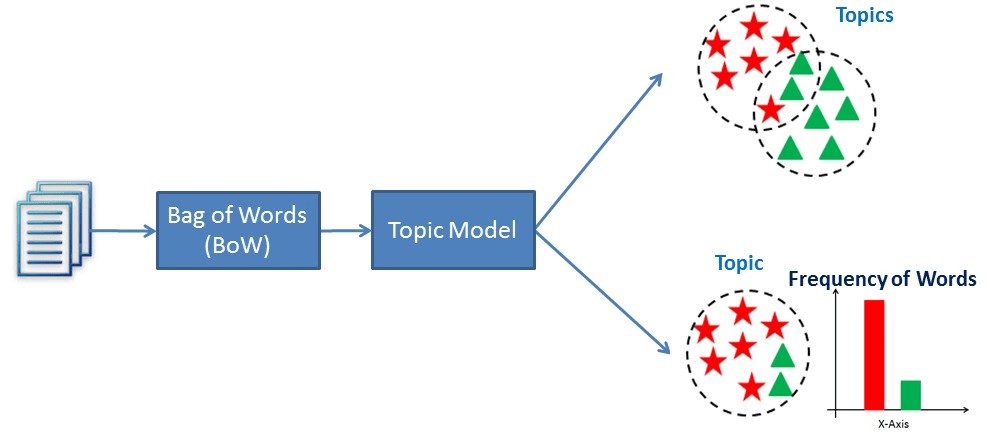

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

documentos = ['_ronaldo _ronaldo _messi balon',
             '_ronaldo _messi _messi _messi',
             'gasol gasol triple balon',
             'triple triple gasol']

vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(documentos)

# Resultados
pd.DataFrame(matrix.toarray(), index=['Doc 1', 'Doc 2', 'Doc 3', 'Doc 4'], columns=vectorizer.get_feature_names_out()).head()


,_messi,_ronaldo,balon,gasol,triple
Doc 1,1,2,1,0,0
Doc 2,3,1,0,0,0
Doc 3,0,0,1,2,1
Doc 4,0,0,0,1,2


## Obtención de los factores latentes


* Sin entrar todavía en detalle, vamos a aplicar el SVD (Singular Value Descomposition) a la matriz para obtener los factores latentes de los documentos y las palabras.


* Por simplicidad y por tratarse de un caso didáctico, vamos a seleccionar 2 componentes principales.


* El SVD, descompone la 'matriz original' en 3 matrices U, S y V.


* Para entender el ejemplo vamos a tener:

    - ***Factores latentes de los documentos*** = U · S
    - ***Factores latentes de las palabras*** = S · V
    
   
<hr>


### Factores latentes de los documentos

In [3]:
from sklearn.decomposition import TruncatedSVD
pd.options.display.float_format = '{:,.2f}'.format

svd = TruncatedSVD(n_components=2)
U_S = svd.fit_transform(matrix)

# Resultados
pd.DataFrame(U_S, index=['Doc 1', 'Doc 2', 'Doc 3', 'Doc 4'], columns=['Factor 1', 'Factor 2']).head()

,Factor 1,Factor 2
Doc 1,2.07,0.04
Doc 2,3.00,-0.43
Doc 3,0.37,2.29
Doc 4,0.18,2.02


* En los resultados obtenidos, podemos ver:
    - Factores latentes de los ***documentos 1 y 2 son similares entre sí***
    - Factores latentes de los ***documentos 3 y 4 son similares entre sí***
    - Factores latentes de los ***documentos 1 y 2 son diferentes  de los factores latentes de los documentos 3 y 4***.
    
    
* Con estas conclusiones vemos que la hipótesis inicial de que habia dos temas distintos (fútbol y baloncesto) en el corpus es correcta y se pueden diferenciar con los factores latentes que representan a los documentos.


<hr>


### Factores latentes de la palabras

In [4]:
import numpy as np

V_S = np.dot(np.diag(svd.singular_values_), svd.components_)

# Resultados
pd.DataFrame(V_S, index=['Factor 1', 'Factor 2'], columns=vectorizer.get_feature_names_out()).head()

,_messi,_ronaldo,balon,gasol,triple
Factor 1,3.02,1.95,0.67,0.25,0.20
Factor 2,-0.41,-0.11,0.76,2.14,2.05


* En estos resultados también podemos ver:
    - Factores latentes de las ***palabras _messi y _ronaldo son similares entre sí***
    - Factores latentes de las ***palabras gasol y triple son similares entre sí***
    - Factores latentes de las ***palabras _messi y _ronaldo son diferentes  de los factores latentes de las palabras gasol y triple***.


* Con estas conclusiones podemos ver también como las palabras se pueden diferenciar en dos temas distintos.


[The benefits of topic modeling](https://www.qualtrics.com/experience-management/research/topic-modeling/#:~:text=The%20benefits%20of%20topic%20modeling)

For example, say you want to understand what people are saying about your product on social media. You could combine topic modeling techniques with [sentiment analysis](https://www.qualtrics.com/experience-management/research/sentiment-analysis/) to discover which aspects or features (topics) of your product are being discussed most often. You can then use sentiment analysis to see if people’s experiences of your product are positive, negative, or neutral.
